# Library Import

In [1]:
import pandas as pd

import plotly as plt
plt.offline.init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go 
from sklearn.cross_validation import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

import keras
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
from seaborn import heatmap
%matplotlib inline


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

Using TensorFlow backend.


# Histograms

In [2]:
team= pd.read_csv('Final Team.csv') # importing the data
a=team['0-3 feet FGA %']
b=team['3-10 feet FGA %']
c=team['10-16 feet FGA %']
d=team['16 feet and away FGA %']
hist_data=[a,b,c,d]
group_labels=['0-3 feet FGA %','3-10 feet FGA% ','10-16 feet FGA %','16 feet and away FGA %']
fig = ff.create_distplot(hist_data,group_labels,bin_size=0.02)
plt.offline.iplot(fig, filename='Distplot with Multiple Datasets') # making the plot

In [3]:
player=pd.read_csv('Final Player.csv')
player=player.iloc[8681:,0:25]
player=player.dropna(axis=0,how='any')
a=player['Total Rebound %']
b=player['Assist %']
e=player['Turn Over %']
hist_data=[a,b,e]
group_labels=['Total Rebound %','Assist %','Turn Over %']
fig = ff.create_distplot(hist_data,group_labels,bin_size=10)
plt.offline.iplot(fig, filename='Distplot with Multiple Datasets')

# Player Data Import, Slicing and Dicing

In [4]:
player=pd.read_csv('Final Player.csv')
player=player.iloc[:,0:25] # selecting 
player=player.drop(['Year','Team','Player','Minutes Played'],axis=1) # removing the selected columns
player=player.iloc[0:16859:,] 
player=player.dropna(axis=0,how='any') # removing the NA values
x=player.iloc[:,0:21]  # independent variables
y=player['Value of Replacement Player'] # dependent variable

# Training and Testing Sets

In [5]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Gradient Boosting Regression for Final Player Dataset

In [6]:
grad=GradientBoostingRegressor(max_depth=10)
fit=grad.fit(x_train,y_train)
predict=grad.predict(x_test)
score=r2_score(y_test,predict)
score

0.99988556292890174

# Generating Cross Validated Estimates

In [7]:
predicted = cross_val_predict(grad, x, y, cv=10)

# Plotting the Cross Validated Model

In [8]:
trace1 = go.Scatter(x=y, y=predicted, mode='markers',
                    marker = dict(size=8,
                                  color='rgb(0, 0, 255)',
                                  line=dict(
                                    width=2,
                                    color='rgb(0, 0, 0)'))
                   )
trace2 = go.Scatter(x=[y.min(), y.max()],y=[y.min(), y.max()],
                    line = dict(color=('rgb(0, 0, 0)'),
                                width=5, dash='dash')
                   )
layout = go.Layout(showlegend=False,
                   yaxis=dict(
                    range = [-10,60],
                    zeroline=False,
                    title='Predicted'),
                   xaxis=dict(
                    title='Measured',)
                  )

fig = go.Figure(data = [trace1,trace2], layout = layout)
plt.offline.iplot(fig, filename="c-v-predict")


# Neural Network Prediction for Player Dataset

In [13]:
data = pd.read_csv('./player.csv')
for name in data.columns:
    if 'Unnamed' in name:
        del data[name]
print(data.columns)

Index(['Age', 'Games', 'Minutes Played', 'Player Efficiency Rating',
       'True Shooting %', 'Free Throw Attempt Rate', 'Offensive Rebound %',
       'Defensive Rebound %', 'Total Rebound %', 'Assist %', 'Steal %',
       'Block %', 'Turn Over %', 'Usage %', 'Offensive Win Shares',
       'Defensive Win Shares', 'Win Shares', 'Win Shares per 48 minutes',
       'Offensive Box Plus/Minus', 'Defensive Box Plus Minus',
       'Box Plus Minus', 'Value of Replacement Player'],
      dtype='object')


In [14]:
print(len(data))
data = data.dropna(axis=0, how='any')
print(len(data))

17729
16781


## Normalize data

In [15]:
for col_name in data.columns:
    if '%' in col_name:
        data[col_name] /= 100.
    else:
        a = data[col_name]
        a = a - a.min()
        a = a / a.max()
        data[col_name] = a

data.head()

Age     Games  Minutes Played  Player Efficiency Rating  \
0  0.307692  1.000000        1.000000                  0.483842   
1  0.423077  1.000000        0.910916                  0.499317   
2  0.538462  0.987654        0.892219                  0.490214   
3  0.423077  0.938272        0.883695                  0.497041   
4  0.307692  0.962963        0.874622                  0.512517   

   True Shooting %  Free Throw Attempt Rate  Offensive Rebound %  \
0          0.00481                 0.056667                0.080   
1          0.00521                 0.054333                0.036   
2          0.00489                 0.060833                0.102   
3          0.00533                 0.038833                0.080   
4          0.00567                 0.068667                0.078   

   Defensive Rebound %  Total Rebound %  Assist %  \
0                0.258            0.170     0.068   
1                0.064            0.050     0.222   
2                0.227            0.164     0.065   
3                0.256            0.170     0.157   
4                0.247            0.164     0.134   

              ...               Turn Over %  Usage %  Offensive Win Shares  \
0             ...                     0.135    0.233              0.251366   
1             ...                     0.128    0.268              0.502732   
2             ...                     0.123    0.216              0.360656   
3             ...                     0.139    0.188              0.502732   
4             ...                     0.158    0.261              0.546448   

   Defensive Win Shares  Win Shares  Win Shares per 48 minutes  \
0              0.594059    0.355263                   0.561181   
1              0.267327    0.416667                   0.567212   
2              0.574257    0.434211                   0.569151   
3              0.574257    0.543860                   0.577553   
4              0.495050    0.548246                   0.578199   

   Offensive Box Plus/Minus  Defensive Box Plus Minus  Box Plus Minus  \
0                  0.600559                  0.485348        0.667585   
1                  0.639665                  0.459707        0.693297   
2                  0.614525                  0.503663        0.690542   
3                  0.630354                  0.520147        0.715335   
4                  0.635940                  0.496337        0.707071   

   Value of Replacement Player  
0                     0.233577  
1                     0.401460  
2                     0.379562  
3                     0.532847  
4                     0.481752  

[5 rows x 22 columns]

## Divide data into train/test

In [16]:
def get(df, predict_col_name):
    Y = df[predict_col_name]
    X = df.loc[:, df.columns != predict_col_name]
    return X.as_matrix(), Y.as_matrix()


data = shuffle(data)
train_percentage = 0.8
l = int(len(data) * train_percentage)
train_data = data.iloc[: l, :]
test_data = data.iloc[l :, :]

dependent_variable = 'Defensive Rebound %'
train_x, train_y = get(train_data, dependent_variable)
test_x, test_y = get(test_data, dependent_variable)

In [17]:
train_x.shape

(13424, 21)

# Training

In [18]:
net_input = Input(shape=(train_x.shape[1],))
x = Dense(64, activation='sigmoid')(net_input)
x = Dense(32, activation='tanh')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=net_input, outputs=out)
model.compile(optimizer='sgd', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(train_x, train_y, batch_size=256, epochs=50, validation_data=(test_x, test_y))

Train on 13424 samples, validate on 3357 samples
Epoch 1/50
13424/13424 [==============================] - 0s - loss: 0.0135 - val_loss: 0.0072
Epoch 2/50
13424/13424 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0050
Epoch 3/50
13424/13424 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0044
Epoch 4/50
13424/13424 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0043
Epoch 5/50
13424/13424 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0042
Epoch 6/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0042
Epoch 7/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0042
Epoch 8/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0042
Epoch 9/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0042
Epoch 10/50
13424/13424 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0042


# Shots Data Import

In [20]:
shots=pd.read_csv('shots1.csv')
shots=shots.iloc[:,3:31]
y=shots['NBA_FANTASY_PTS']
del shots['NBA_FANTASY_PTS']
x=shots
shots=shots.dropna(axis=0,how='any')

# Training and Testing Sets

In [21]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Gradient Boosting Regression

In [22]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
grad=GradientBoostingRegressor(**params)
fit=grad.fit(x_train,y_train)
predict=grad.predict(x_test)
mse=mean_squared_error(y_test,predict)
print(mse)

0.319838250254


# Plotting the Loss Function for Gradient Boosting

In [24]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(predict):
    test_score[i] = grad.loss_(y_test, y_pred)

train = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                   y=grad.train_score_, 
                   name='Training Set Deviance',
                   mode='lines',
                   line=dict(color='blue')
                  )
test = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                  y=test_score, 
                  mode='lines',
                  name='Test Set Deviance',
                  line=dict(color='red')
                 )

layout = go.Layout(title='Deviance',
                   xaxis=dict(title='Boosting Iterations'),
                   yaxis=dict(title='Deviance')
                  )

fig = go.Figure(data=[test, train], layout=layout)
plt.offline.iplot(fig)  
# plt.offline.plot(fig)  

# Plotting the Feature Importance obtained from Gradient Boosting Model

In [26]:
feature_importance = grad.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
trace = go.Bar(x=feature_importance[sorted_idx],
               y=shots.columns[sorted_idx],
               orientation = 'h'
              )

layout = go.Layout(xaxis=dict(title='Relative Importance'),
                   yaxis=dict(title='Variable Importance')
                  )
fig = go.Figure(data=[trace], layout=layout)
plt.offline.iplot(fig) 

# Neural Network Prediction for Shots1 Dataset

In [27]:
data = pd.read_csv('./shots1.csv')
for name in data.columns:
    if 'Unnamed' in name:
        del data[name]
print(data.columns)

Index(['AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS'],
      dtype='object')


In [28]:
print(len(data))
data = data.dropna(axis=0, how='any')
print(len(data))

434
434


# Normalize & visualize data

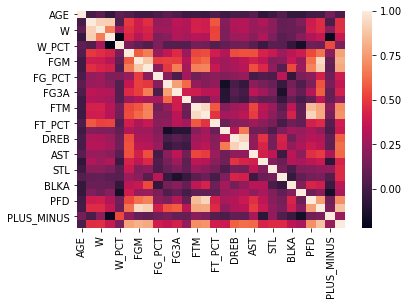

In [29]:
for col_name in data.columns:
    if '_PCT' in col_name:
        data[col_name] /= 1.
    else:
        a = data[col_name]
        a = a - a.min()
        a = a / a.max()
        data[col_name] = a

data.head()
heatmap(data.corr())

# Divide data into train/test

In [30]:
def get(df, predict_col_name):
    Y = df[predict_col_name]
    X = df.loc[:, df.columns != predict_col_name]
    return X.as_matrix(), Y.as_matrix()


data = shuffle(data)
train_percentage = 0.8
l = int(len(data) * train_percentage)
train_data = data.iloc[: l, :]
test_data = data.iloc[l :, :]

dependent_variable = 'NBA_FANTASY_PTS'
train_x, train_y = get(train_data, dependent_variable)
test_x, test_y = get(test_data, dependent_variable)

print('train input shape:', train_x.shape)
print('test  input shape:', test_x.shape)

train input shape: (347, 27)
test  input shape: (87, 27)


# Neural Network Training

In [33]:
net_input = Input(shape=(train_x.shape[1],))
x = Dense(64, activation='sigmoid')(net_input)
x = Dense(32, activation='tanh')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=net_input, outputs=out)
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 27)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1792      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


In [34]:
import shutil
shutil.rmtree('./logs', ignore_errors=True)
        
model.fit(train_x, 
          train_y, 
          batch_size=256, 
          epochs=500, 
          validation_data=(test_x, test_y), 
          callbacks=[TensorBoard()])

Train on 347 samples, validate on 87 samples
Epoch 1/500
347/347 [==============================] - 0s - loss: 0.2725 - val_loss: 0.1894
Epoch 2/500
347/347 [==============================] - 0s - loss: 0.1824 - val_loss: 0.1138
Epoch 3/500
347/347 [==============================] - 0s - loss: 0.1070 - val_loss: 0.0627
Epoch 4/500
347/347 [==============================] - 0s - loss: 0.0575 - val_loss: 0.0367
Epoch 5/500
347/347 [==============================] - 0s - loss: 0.0323 - val_loss: 0.0276
Epoch 6/500
347/347 [==============================] - 0s - loss: 0.0230 - val_loss: 0.0267
Epoch 7/500
347/347 [==============================] - 0s - loss: 0.0217 - val_loss: 0.0286
Epoch 8/500
347/347 [==============================] - 0s - loss: 0.0229 - val_loss: 0.0310
Epoch 9/500
347/347 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0331
Epoch 10/500
347/347 [==============================] - 0s - loss: 0.0267 - val_loss: 0.0347
Epoch 11/500
347/347 [============

347/347 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0093
Epoch 89/500
347/347 [==============================] - 0s - loss: 0.0064 - val_loss: 0.0092
Epoch 90/500
347/347 [==============================] - 0s - loss: 0.0063 - val_loss: 0.0090
Epoch 91/500
347/347 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0088
Epoch 92/500
347/347 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0087
Epoch 93/500
347/347 [==============================] - 0s - loss: 0.0059 - val_loss: 0.0085
Epoch 94/500
347/347 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0083
Epoch 95/500
347/347 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0082
Epoch 96/500
347/347 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0080
Epoch 97/500
347/347 [==============================] - 0s - loss: 0.0054 - val_loss: 0.0079
Epoch 98/500
347/347 [==============================] - 0s - loss: 0.0053 - val_los

347/347 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0028
Epoch 176/500
347/347 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 177/500
347/347 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 178/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0027
Epoch 179/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0026
Epoch 180/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0026
Epoch 181/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0026
Epoch 182/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0026
Epoch 183/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0025
Epoch 184/500
347/347 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0025
Epoch 185/500
347/347 [==============================] - 0s - loss: 0.0015

347/347 [==============================] - 0s - loss: 9.4219e-04 - val_loss: 0.0015
Epoch 262/500
347/347 [==============================] - 0s - loss: 9.3795e-04 - val_loss: 0.0015
Epoch 263/500
347/347 [==============================] - 0s - loss: 9.3322e-04 - val_loss: 0.0015
Epoch 264/500
347/347 [==============================] - 0s - loss: 9.2882e-04 - val_loss: 0.0015
Epoch 265/500
347/347 [==============================] - 0s - loss: 9.2561e-04 - val_loss: 0.0014
Epoch 266/500
347/347 [==============================] - 0s - loss: 9.2312e-04 - val_loss: 0.0014
Epoch 267/500
347/347 [==============================] - 0s - loss: 9.2008e-04 - val_loss: 0.0014
Epoch 268/500
347/347 [==============================] - 0s - loss: 9.1425e-04 - val_loss: 0.0014
Epoch 269/500
347/347 [==============================] - 0s - loss: 9.0873e-04 - val_loss: 0.0014
Epoch 270/500
347/347 [==============================] - 0s - loss: 9.0652e-04 - val_loss: 0.0014
Epoch 271/500
347/347 [===========

347/347 [==============================] - 0s - loss: 7.1598e-04 - val_loss: 0.0011
Epoch 344/500
347/347 [==============================] - 0s - loss: 7.1399e-04 - val_loss: 0.0011
Epoch 345/500
347/347 [==============================] - 0s - loss: 7.1196e-04 - val_loss: 0.0011
Epoch 346/500
347/347 [==============================] - 0s - loss: 7.1024e-04 - val_loss: 0.0011
Epoch 347/500
347/347 [==============================] - 0s - loss: 7.0929e-04 - val_loss: 0.0011
Epoch 348/500
347/347 [==============================] - 0s - loss: 7.0770e-04 - val_loss: 0.0011
Epoch 349/500
347/347 [==============================] - 0s - loss: 7.0497e-04 - val_loss: 0.0011
Epoch 350/500
347/347 [==============================] - 0s - loss: 7.0389e-04 - val_loss: 0.0011
Epoch 351/500
347/347 [==============================] - 0s - loss: 7.0369e-04 - val_loss: 0.0011
Epoch 352/500
347/347 [==============================] - 0s - loss: 7.0121e-04 - val_loss: 0.0011
Epoch 353/500
347/347 [===========

347/347 [==============================] - 0s - loss: 6.0523e-04 - val_loss: 9.5174e-04
Epoch 426/500
347/347 [==============================] - 0s - loss: 6.0418e-04 - val_loss: 9.5113e-04
Epoch 427/500
347/347 [==============================] - 0s - loss: 6.0326e-04 - val_loss: 9.5095e-04
Epoch 428/500
347/347 [==============================] - 0s - loss: 6.0266e-04 - val_loss: 9.5094e-04
Epoch 429/500
347/347 [==============================] - 0s - loss: 6.0290e-04 - val_loss: 9.4874e-04
Epoch 430/500
347/347 [==============================] - ETA: 0s - loss: 6.0451e-0 - 0s - loss: 6.0016e-04 - val_loss: 9.4464e-04
Epoch 431/500
347/347 [==============================] - 0s - loss: 5.9920e-04 - val_loss: 9.4356e-04
Epoch 432/500
347/347 [==============================] - 0s - loss: 6.0080e-04 - val_loss: 9.4347e-04
Epoch 433/500
347/347 [==============================] - 0s - loss: 6.0180e-04 - val_loss: 9.4177e-04
Epoch 434/500
347/347 [==============================] - 0s - loss: 